In [5]:
#import libraries
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [6]:
DATA_PATH = "/content/drive/MyDrive/audio_data.json"

In [ ]:
# plan

#create train, validation and test set
#build the CNN net
#compile the network
#train the CNN
#evaluate the CNN on the test set
#make predictions on a sample

In [7]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [24]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)
    fig.tight_layout()

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "upper left")
    axs[0].set_title("Accuracy eval")


    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="lower left")
    axs[1].set_title("Error eval")

    plt.show()

In [12]:
def prepare_dataset(test_size,validation_size):
    """Splits the data into training, testing and validation sets
        :param test_size: percentage of data as test data
        :param validation_size: percentage of data as validation data
        :return X_train(ndarray) : training data on Input
        :return y_train(ndarray) : training data on Output
        :return X_test(ndarray) : test data on Input
        :return y_test(ndarray) : test data on Output
        :return X_validation(ndarray) : validation set of Input
        :return y_validation(ndarray) : validation set of Output
    """

  #load data
  X,y = load_data(DATA_PATH)

  # create train/test split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

  # create train/validation split
  X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=validation_size)

  #add extra dimension
  X_train = X_train[...,np.newaxis] #4d array
  X_validation = X_validation[...,np.newaxis]
  X_test = X_test[...,np.newaxis]

  #return
  return X_train, X_validation, X_test, y_train, y_validation, y_test


In [10]:
def build_model(input_shape):
  """builds a convulational network with three layers
     :param input_shape: the shape of the input as 3 dimensions
     :return model: the CNN model
  """
  #create model
  model = keras.Sequential()
  
  #1st conv layer
  model.add(keras.layers.Conv2D(32, #number of kernels
                               (3,3), #size of kernel
                                activation = 'relu',
                                input_shape = input_shape))
  
  model.add(keras.layers.MaxPool2D((3,3), #size
                                   strides = (2,2),
                                   padding = 'same'))
  
  model.add(keras.layers.BatchNormalization())

  #2nd conv layer
  model.add(keras.layers.Conv2D(32, #number of kernels
                               (3,3), #size of kernel
                                activation = 'relu',
                                input_shape = input_shape))
  
  model.add(keras.layers.MaxPool2D((3,3), #size
                                   strides = (2,2),
                                   padding = 'same'))
  
  model.add(keras.layers.BatchNormalization())

  #3rd conv layer
  model.add(keras.layers.Conv2D(32, #number of kernels
                               (2,2), #size of kernel
                                activation = 'relu',
                                input_shape = input_shape))
  
  model.add(keras.layers.MaxPool2D((2,2), #size
                                   strides = (2,2),
                                   padding = 'same'))
  
  model.add(keras.layers.BatchNormalization())

  #flatten the output and feed it into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, 
                               activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  #outut layer
  model.add(keras.layers.Dense(10, activation = 'softmax'))

  #return model
  return model

In [28]:
def predict(X,y,model):
  """Predicts on a single data 
    param X: Input data
    param y: true output of given data
  """
  
  X = X[np.newaxis, ...]
  prediction = model.predict(X) 

  #extract index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Expected  index: {}, predicted index: {}".format(y,predicted_index))

In [13]:
#create train, validation and test set 
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25,0.2)

In [14]:
#build the CNN net
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_model(input_shape)

In [15]:
#compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [18]:
#train the CNN
history = model.fit(X_train, y_train, 
          validation_data = (X_validation, y_validation), 
          batch_size = 32, epochs = 30)

Epoch 1/30
188/188 [==============================] - 11s 59ms/step - loss: 0.7372 - accuracy: 0.7424 - val_loss: 0.8442 - val_accuracy: 0.7020
Epoch 2/30
188/188 [==============================] - 11s 59ms/step - loss: 0.7258 - accuracy: 0.7462 - val_loss: 0.8446 - val_accuracy: 0.7067
Epoch 3/30
188/188 [==============================] - 11s 59ms/step - loss: 0.7026 - accuracy: 0.7575 - val_loss: 0.8356 - val_accuracy: 0.7013
Epoch 4/30
188/188 [==============================] - 11s 58ms/step - loss: 0.6967 - accuracy: 0.7562 - val_loss: 0.8391 - val_accuracy: 0.7093
Epoch 5/30
188/188 [==============================] - 10s 56ms/step - loss: 0.6726 - accuracy: 0.7639 - val_loss: 0.8193 - val_accuracy: 0.7060
Epoch 6/30
188/188 [==============================] - 10s 53ms/step - loss: 0.6714 - accuracy: 0.7734 - val_loss: 0.8374 - val_accuracy: 0.7127
Epoch 7/30
188/188 [==============================] - 10s 54ms/step - loss: 0.6616 - accuracy: 0.7654 - val_loss: 0.8226 - val_accuracy:

In [17]:
#evaluate the CNN on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy on test set is {}".format(test_accuracy))
print("Error on test set is {}".format(test_error))

79/79 [==============================] - 1s 15ms/step - loss: 0.8636 - accuracy: 0.7019
Accuracy on test set is 0.7018807530403137
Error on test set is 0.8635839223861694


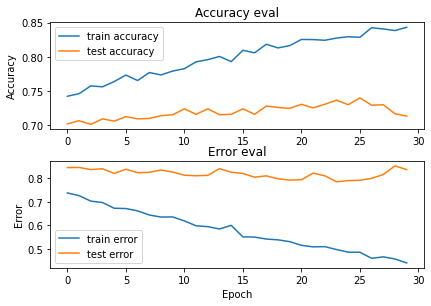

In [25]:
plot_history(history)

In [29]:
#make predictions on a sample
X = X_test[100]
y = y_test[100]

predict(X, y, model)

Expected  index: 6, predicted index: [6]
